# Simple Linear Regression Part-2

# Find a good model to get a Salary_data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [3]:
data =pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data[data.isnull()].sum()

YearsExperience    0.0
Salary             0.0
dtype: float64

In [6]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
print(data.shape,"Shape of DataFrame")
print("="*27)
print(data.head(20))

(30, 2) Shape of DataFrame
    YearsExperience   Salary
0               1.1  39343.0
1               1.3  46205.0
2               1.5  37731.0
3               2.0  43525.0
4               2.2  39891.0
5               2.9  56642.0
6               3.0  60150.0
7               3.2  54445.0
8               3.2  64445.0
9               3.7  57189.0
10              3.9  63218.0
11              4.0  55794.0
12              4.0  56957.0
13              4.1  57081.0
14              4.5  61111.0
15              4.9  67938.0
16              5.1  66029.0
17              5.3  83088.0
18              5.9  81363.0
19              6.0  93940.0


# Visualization

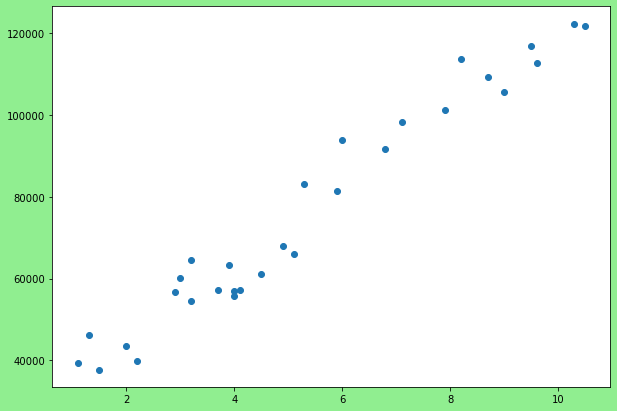

In [9]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data["YearsExperience"],data["Salary"]);

It is positively linearly spread.

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Create a model with SKLEARN

In [11]:
ls = LinearRegression()

x = data["YearsExperience"].values.reshape(-1,1)
y = data["Salary"].values.reshape(-1,1)

reg_sklearn = ls.fit(x,y)

In [12]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[9449.96232146]]
[25792.20019867]


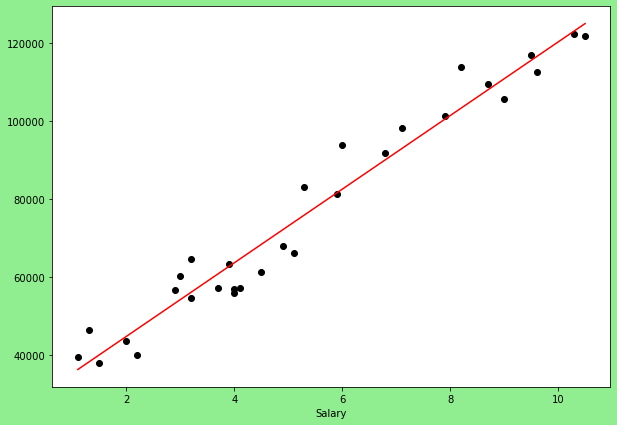

In [13]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data["YearsExperience"],data["Salary"],color="black");
plt.plot(data["YearsExperience"],data["YearsExperience"]*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red");
plt.xlabel("YearsExperience");
plt.xlabel("Salary");
plt.show()

# Model validation

In [15]:
pred_train_lm=reg_sklearn.predict(data["YearsExperience"].values.reshape(-1,1)).flatten().tolist()
r2_score(data["Salary"],pred_train_lm)

0.9569566641435086

# Model with statsmodels

In [16]:
first_model =smf.ols("Salary~YearsExperience",data=data).fit()
pred_statsmodel = first_model.predict(data["YearsExperience"])
r2_score(data["Salary"],pred_train_lm)

0.9569566641435086

In [17]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        22:47:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Here for above OLS regression results R-Squared value is 0.957 which is greater than 0.85 hence we say this model1 is good model.